# 키워드 분석(Keyword Analysis)

* 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
* 핵심어 분석이란 불용어 제거와 어간추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출   
* 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초  
* 물론 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋음
* 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음

## 한글 폰트 설정

* 실행 후 런타임 재시작 필요

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


## 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

## 이태원 참사 유튜브 댓글 데이터



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving result.xlsx to result.xlsx


In [ ]:
import pandas as pd
data = pd.read_excel('result.xlsx')

In [ ]:
data.head()

,Unnamed: 0,아이디,댓글 내용
0,0,모두들 사랑해요,아무것도 아닌거에 150명이 사망했다는게 너무 놀랍다...자연재해도 아니고전쟁도 아...
1,1,듀얼 인생,이게 영화나 드라마가 아닌 실제 상황이란게 진짜 믿겨지지 않고 그냥 공포 그 자체다..
2,2,멜로뤼,너무 무섭고 기괴하다... 단체로 있으니까 한명이 밀기 시작하면 다른 사람들도 '그...
3,3,클랜드,여기서 밀어밀어 라고 외쳤던분들...죽을때까지 마음의 짐 가지고 그소리에 사람들이 ...
4,4,Haisley,다들 젊고 어린 사람들인데 논다고 갔다가 죽어서 돌아오니 부모님들 얼마나 마음이 아...


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
comment_list = list(data['댓글 내용'])

## 형태소 분석을 이용한 명사 추출


* 형태소 분석기 Mecab으로 명사만 추출

In [ ]:
from konlpy.tag import Mecab
tagger = Mecab()

nouns = []
for comment in comment_list :
  for noun in tagger.nouns(comment) :
    nouns.append(noun)

nouns[:10]

['아무것', '거', '명', '사망', '게', '자연재해', '전쟁', '사건', '사고', '명']

In [ ]:
len(nouns)

9727

### 불용어(Stopwords) 사전 만들기

* 형태소 분석을 통해 조사, 접속사 등의 제거 가능
* 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요


In [ ]:
stop_words = '니가 앞 데 이게 차 대 뒤 명 곳 대 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것'
stop_words = stop_words.split(' ')

### 불용어를 제외하여 형태소 분석 수행

* 한글 텍스트에 대해서 형태소 분석 수행
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [ ]:
nouns = []
for comment in comment_list :
  for noun in tagger.nouns(comment) :
    if noun not in stop_words :
      nouns.append(noun)
len(nouns)

8113

## 단어 빈도수 측정

* 단어 빈도수 측정에는 `collections` 라이브러리의 `Counter` 함수를 이용
* `collections` 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [ ]:
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'사람': 339,
 '명복': 170,
 '빕': 157,
 '고인': 149,
 '사고': 104,
 '할로윈': 93,
 '경찰': 89,
 '생각': 82,
 '이태원': 80,
 '니다': 72,
 '나라': 72,
 '축제': 70,
 '상황': 66,
 '우리': 57,
 '사건': 49,
 '인파': 47,
 '통제': 45,
 '인간': 42,
 '안전': 40,
 '행사': 38,
 '애': 37,
 '의식': 37,
 '마음': 36,
 '참사': 35,
 '압사': 35,
 '책임': 35,
 '문제': 35,
 '이해': 34,
 '시민': 34,
 '국민': 29,
 '대한민국': 28,
 '한국': 28,
 '애도': 27,
 '위험': 27,
 '소리': 26,
 '주차': 26,
 '술': 25,
 '누구': 24,
 '탓': 24,
 '영상': 24,
 '년': 24,
 '이번': 24,
 '정부': 24,
 '놈': 24,
 '귀신': 24,
 '불법': 23,
 '위': 23,
 '정도': 23,
 '길': 22,
 '표': 22}

## 단어 빈도 시각화

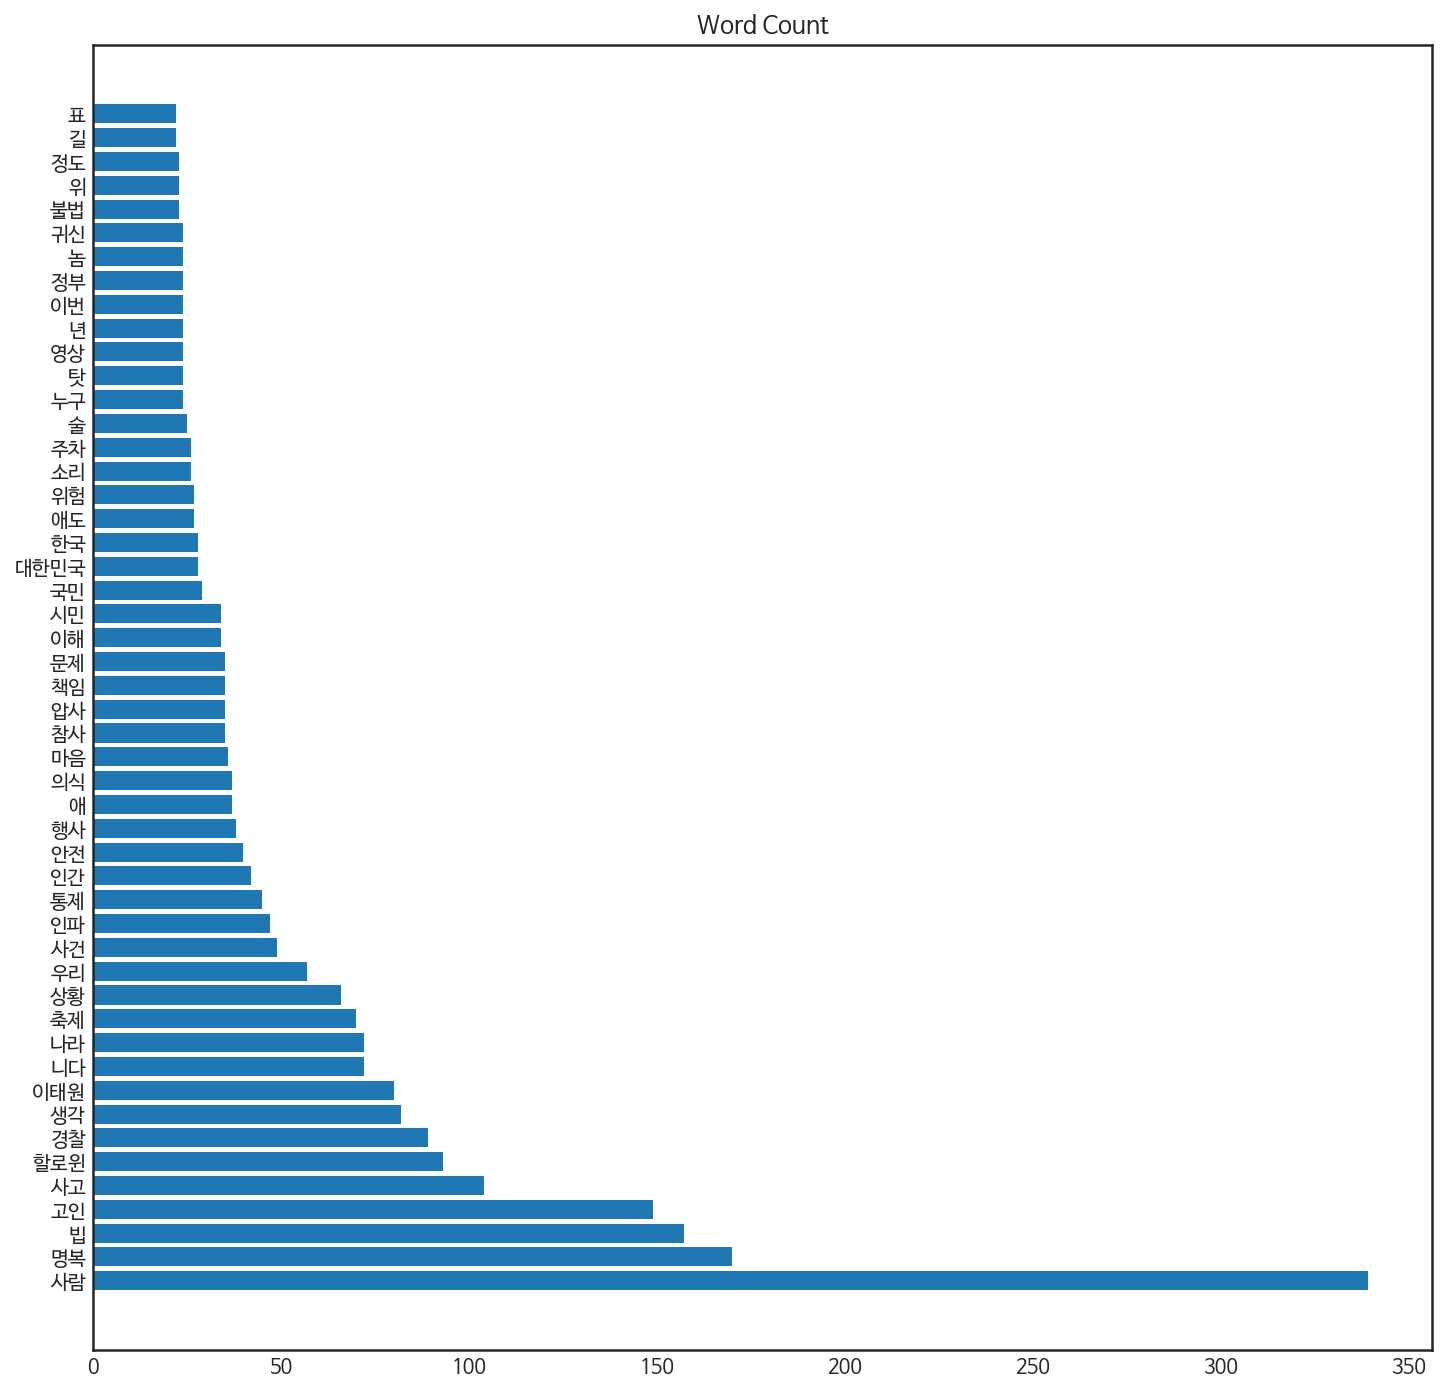

In [ ]:
import numpy as np
y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12, 12))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

## 워드클라우드(WordCloud)

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있음  
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있음

* 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib` 라이브러리와 `WordCloud` 라이브러리를 `import` 해서 사용
* `WordCloud` 라이브러리는 `pip install wordcloud` 명령어를 통해 설치 필요

* WordCloud를 이용해 객체를 생성해주고,
`generate_from_frequencies()` 함수로 빈도 수에 따라 워드클라우드 생성

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)

* 워드클라우드를 시각화할 때는 이미지 시각화 함수인 `imshow()` 함수를 사용해야 함

<function matplotlib.pyplot.show(*args, **kw)>

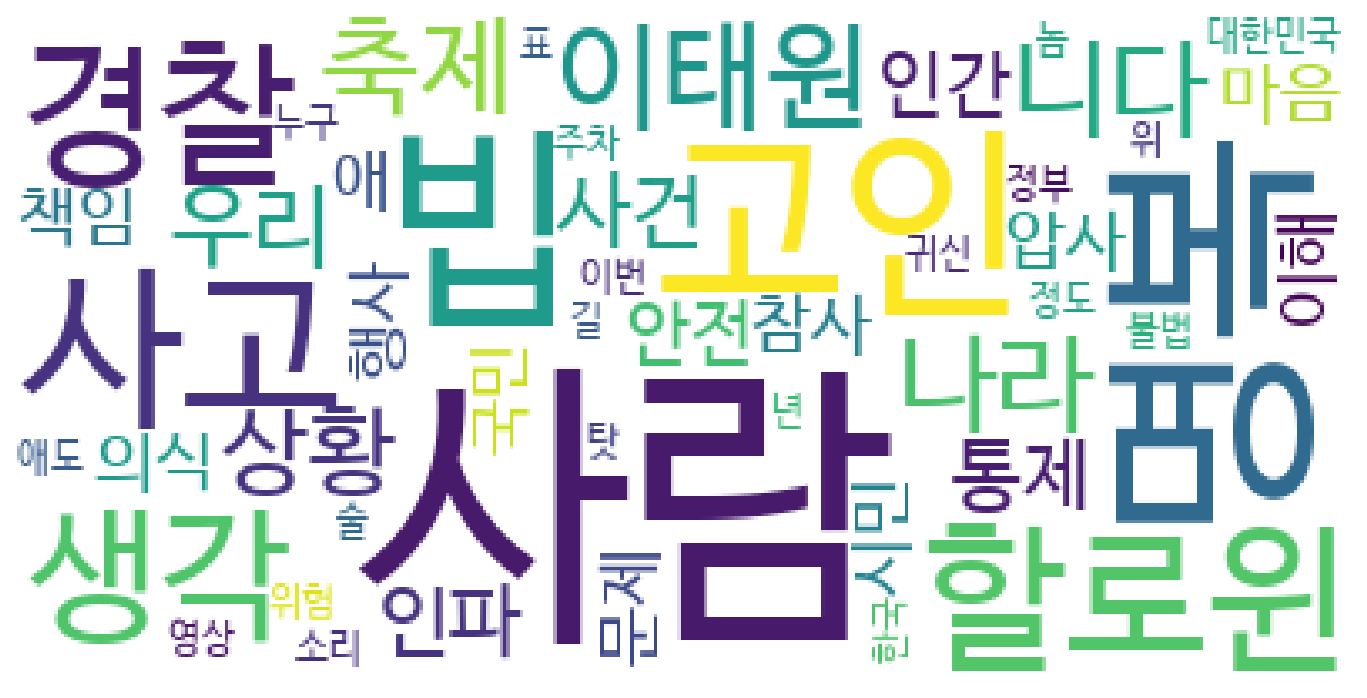

In [ ]:
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show

## squarify 트리맵 시각화

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리
* `squarify` 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄   

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


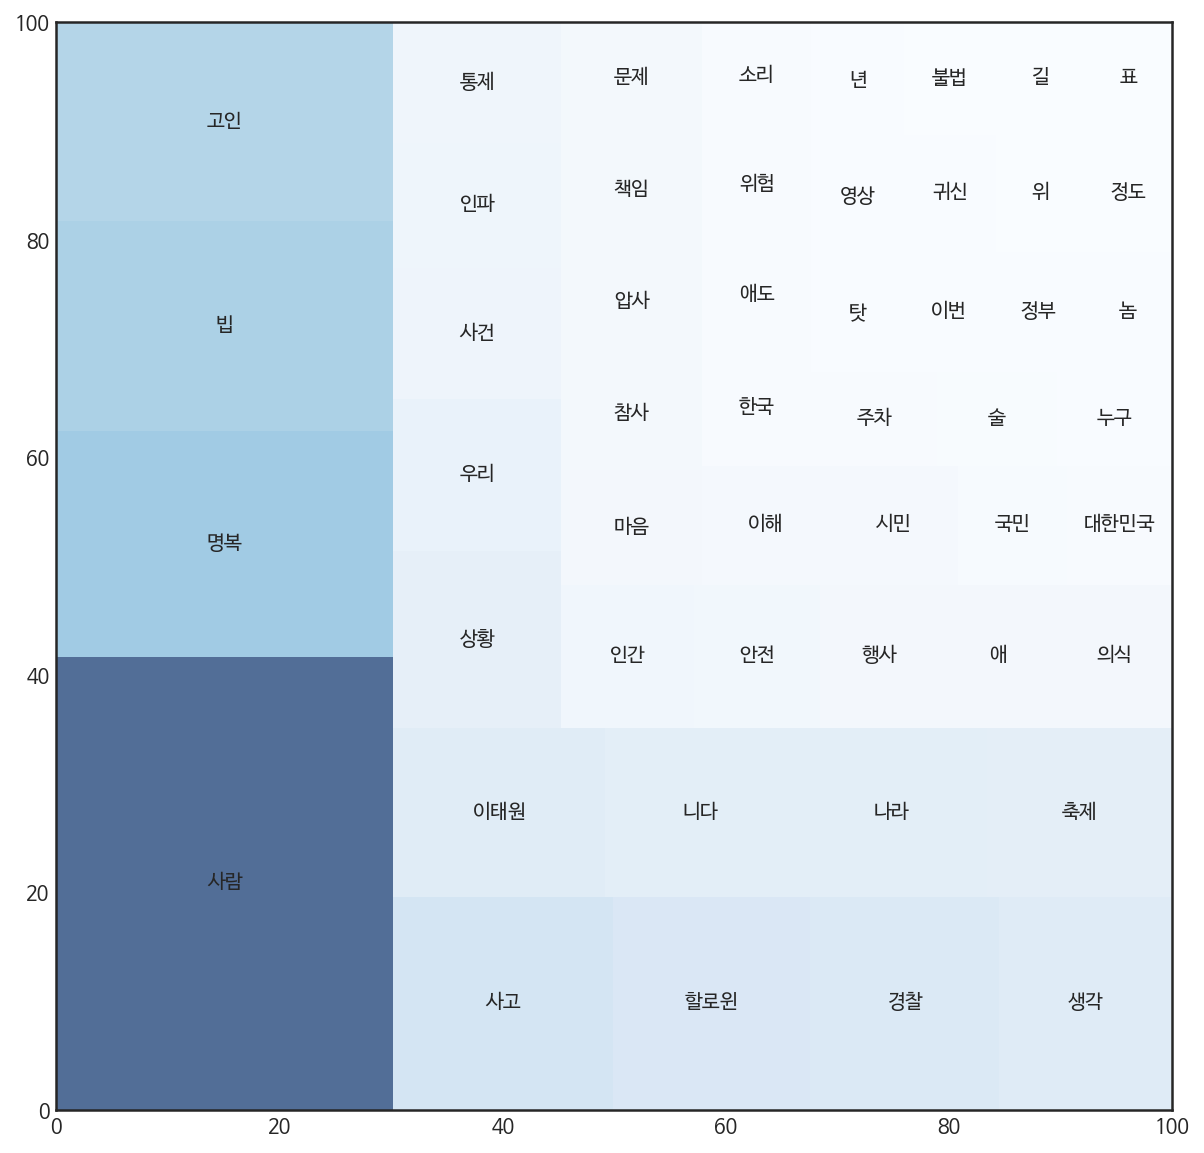

In [ ]:
import squarify
plt.figure(figsize=(10,10))
norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]
squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=0.7)

# 감정분석

In [ ]:
import re
import urllib.request

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

 * https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
 * https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

In [ ]:
train_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
test_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
train_data.drop_duplicates(subset=['document'], inplace=True)

In [ ]:
train_data = train_data.dropna(how='any')

In [ ]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-하-ㅣ가-힣 ]','')
test_data['document'] = test_data['document'].str.replace('[^ㄱ-하-ㅣ가-힣 ]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
train_data['document'].replace('', np.nan, inplace=True)
print(len(train_data))
print(train_data.isnull().sum())

143739
id          0
document    1
label       0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
train_data = train_data.dropna(how='any')
print(len(train_data))

143738


In [ ]:
test_data['document'].replace('', np.nan, inplace=True)
print(len(test_data))
print(test_data.isnull().sum())

50000
id            0
document    269
label         0
dtype: int64


In [ ]:
test_data['document'].replace('', np.nan, inplace=True)

In [ ]:
test_data = test_data.dropna(how='any')

In [ ]:
test_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
mecab = Mecab()

X_train = []
for sentence in train_data['document'] :
  X_train.append([word for word in mecab.morphs(sentence) if not word in stop_words])

In [ ]:
print(X_train[:1])

[['아', '더', '빙', '진짜', '짜증', '네요', '목소리']]


In [ ]:
X_test = []
for sentence in test_data['document'] :
  X_test.append([word for word in mecab.morphs(sentence) if not word in stop_words])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 3
words_count = len(tokenizer.word_index)
rare_count = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items() :
  words_freq = words_freq + value

  if value < threshold :
    rare_count += 1
    rare_freq = rare_freq + value

print('전체 단어 수:', words_count)
print('빈도가 {} 이하인 희귀 단어 수: {}'.format(threshold-1, rare_count))
print('희귀 단어 비율: {}'.format((rare_count / words_count) * 100))
print('희귀 단어 등장 빈도 비율 : {}'.format((rare_freq / words_freq) * 100))

전체 단어 수: 50093
빈도가 2 이하인 희귀 단어 수: 28458
희귀 단어 비율: 56.810332781027284
희귀 단어 등장 빈도 비율 : 1.5715811355338127


In [ ]:
vocab_size = words_count - rare_count + 2
print(vocab_size)

21637


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train))
print(len(y_train))

143707
143707


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
print('리뷰 최대 길이: ', max(len(l) for l in X_train))
print('리뷰 평균 길이: ', sum(map(len, X_train)) / len((X_train)))

리뷰 최대 길이:  93
리뷰 평균 길이:  15.70973578183387


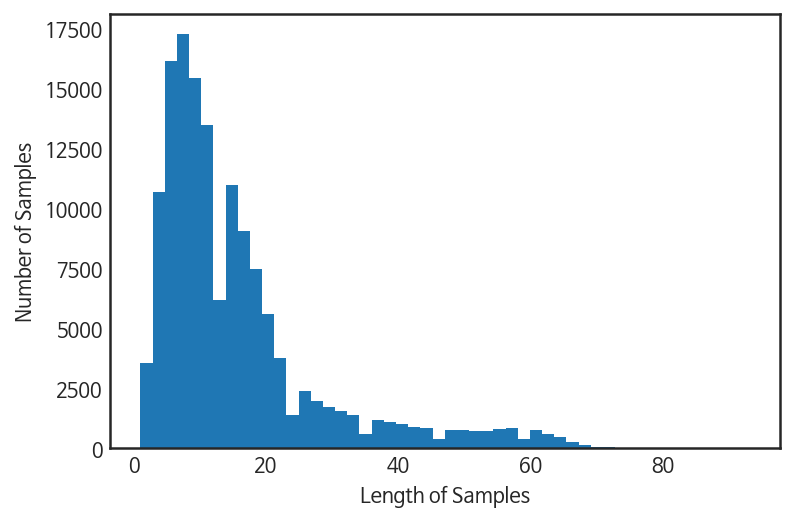

In [ ]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
max_len = 80

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 30))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 30)          649110    
                                                                 
 lstm_29 (LSTM)              (None, None, 128)         81408     
                                                                 
 dropout_23 (Dropout)        (None, None, 128)         0         
                                                                 
 lstm_30 (LSTM)              (None, None, 64)          49408     
                                                                 
 dropout_24 (Dropout)        (None, None, 64)          0         
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_25 (Dropout)        (None, 32)              

In [ ]:
history = model.fit(X_train, y_train, epochs=12, batch_size=60, validation_split=0.2)

Epoch 1/12
 134/1917 [=>............................] - ETA: 9:35 - loss: 0.6342 - acc: 0.6190

KeyboardInterrupt: ignored

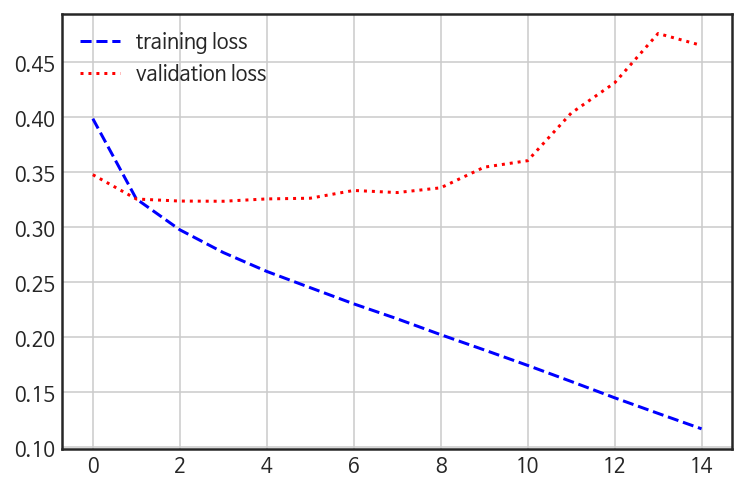

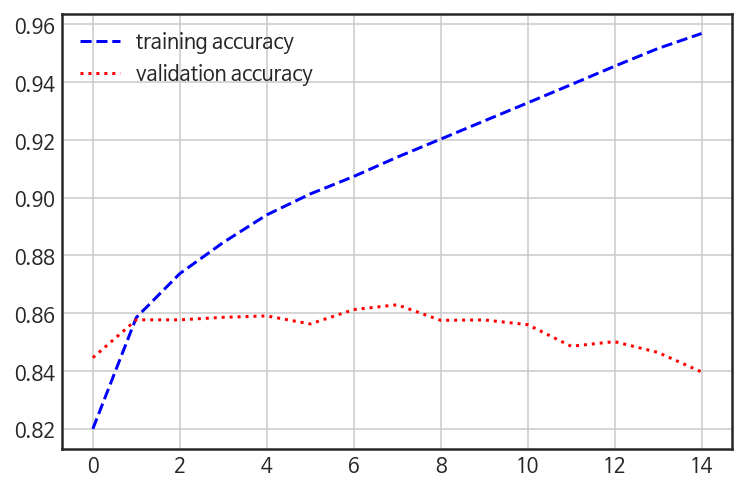

In [ ]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label='training accuracy')
plt.plot(val_acc, 'r:', label='validation accuracy')
plt.legend()
plt.grid()

plt.show()

# 감정 예측

In [ ]:
def sentiment_predict(new_sentence) :
  new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
  new_sequences = tokenizer.texts_to_sequences([new_token])
  new_pad = pad_sequences(new_sequences, maxlen=max_len)
  score = float(model.predict(new_pad))

  if score > 0.5 :
    print("{} -> 긍정({:.2f}%)".format(new_sentence, score*100))
  else:
    print("{} -> 부정({:.2f}%)".format(new_sentence, (1-score)*100))

In [ ]:
sentiment_predict('정말 재미있고 흥미진진 했어요.')
sentiment_predict('어떻게 영화가 이렇게 지루하고 재미없죠?')
sentiment_predict('배우 연기력이 대박입니다.')
sentiment_predict('분위기가 어둡고 스토리가 복잡해요')

1/1 [==============================] - 0s 459ms/step
정말 재미있고 흥미진진 했어요. -> 긍정(99.69%)
1/1 [==============================] - 0s 24ms/step
어떻게 영화가 이렇게 지루하고 재미없죠? -> 부정(99.66%)
1/1 [==============================] - 0s 21ms/step
배우 연기력이 대박입니다. -> 긍정(87.96%)
1/1 [==============================] - 0s 22ms/step
분위기가 어둡고 스토리가 복잡해요 -> 긍정(93.34%)


In [ ]:
print(data.isnull().sum())

아이디      0
댓글 내용    0
dtype: int64


In [ ]:
data.columns = ['id', 'comment']

In [ ]:
data.head()

,id,comment
0,모두들 사랑해요,아무것도 아닌거에 150명이 사망했다는게 너무 놀랍다...자연재해도 아니고전쟁도 아...
1,듀얼 인생,이게 영화나 드라마가 아닌 실제 상황이란게 진짜 믿겨지지 않고 그냥 공포 그 자체다..
2,멜로뤼,너무 무섭고 기괴하다... 단체로 있으니까 한명이 밀기 시작하면 다른 사람들도 '그...
3,클랜드,여기서 밀어밀어 라고 외쳤던분들...죽을때까지 마음의 짐 가지고 그소리에 사람들이 ...
4,Haisley,다들 젊고 어린 사람들인데 논다고 갔다가 죽어서 돌아오니 부모님들 얼마나 마음이 아...


In [ ]:
data['comment'] = data['comment'].str.replace('[^ㄱ-하-ㅣ가-힣 ]','') # 한글이 아닌 글자들은 모두 제거
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,comment
0,모두들 사랑해요,아무것도 아닌거에 명이 사망했다는게 너무 놀랍다자연재해도 아니고전쟁도 아니고다른 사...
1,듀얼 인생,이게 영화나 드라마가 아닌 실제 상황이란게 진짜 믿겨지지 않고 그냥 공포 그 자체다
2,멜로뤼,너무 무섭고 기괴하다 단체로 있으니까 한명이 밀기 시작하면 다른 사람들도 그래도 되...
3,클랜드,여기서 밀어밀어 라고 외쳤던분들죽을때까지 마음의 짐 가지고 그소리에 사람들이 비참하...
4,Haisley,다들 젊고 어린 사람들인데 논다고 갔다가 죽어서 돌아오니 부모님들 얼마나 마음이 아플까요


In [ ]:
data['comment'].replace('',np.nan, inplace=True)
print(len(data))
print(data.isnull().sum())

1265
id         0
comment    1
dtype: int64


In [ ]:
data = data.dropna(how='any')
print(len(data))

1264


In [ ]:
#from sklearn.model_selection import train_test_split
#train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
mecab = Mecab()

X_train = []
for sentence in train_data['comment'] :
  X_train.append([word for word in mecab.morphs(sentence) if not word in stop_words])

In [ ]:
X_train[:3]

In [ ]:
X_test = []
for sentence in test_data['comment'] :
  X_test.append([word for word in mecab.morphs(sentence) if not word in stop_words])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 3
words_count = len(tokenizer.word_index)
rare_count = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items() :
  words_freq = words_freq + value

  if value < threshold :
    rare_count += 1
    rare_freq = rare_freq + value

print('전체 단어 수:', words_count)
print('빈도가 {} 이하인 희귀 단어 수: {}'.format(threshold-1, rare_count))
print('희귀 단어 비율: {}'.format((rare_count / words_count) * 100))
print('희귀 단어 등장 빈도 비율 : {}'.format((rare_freq / words_freq) * 100))

전체 단어 수: 3623
빈도가 2 이하인 희귀 단어 수: 2490
희귀 단어 비율: 68.72757383383936
희귀 단어 등장 빈도 비율 : 12.411953486433543


In [ ]:
vocab_size = words_count - rare_count + 2
print(vocab_size)

1135


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)